In [1]:
import pandas as pd
import numpy as np
import math
from scipy import special
import matplotlib.pyplot as plt
import statsmodels.stats.weightstats as sm
from matplotlib import cm

In [2]:
# N_steps = 10
N_steps_orig = 1800 
N_k = 64
T_h = 18000
N_x = 21
N_y = 21

### Define input files


In [10]:
result_loc = "./../../../../Server_results/01_28_2022_w_bounds/"
run_name = "experiment26_01_13_30_58"

# result_loc = "./../../../../Server_results/10_12_2021_mul_q/"
# run_name = "experiment10_10_22_51_50"

# result_loc = "./../../../../Server_results/10_24_2021_less_tol/"
# run_name = "experiment23_10_01_07_23"

train_loc = "Run_no_zero_flow_no_oscilations_Run_Run_1633563563/"

# run_name = "experiment06_10_11_17_57"
# train_loc = "Run_no_zero_flow_no_oscilations_Run_Run_1633466607/"

### Load files and reshape them

In [11]:

p = np.loadtxt(f"{result_loc}{run_name}p.txt")
p = p.reshape([-1,N_k])

N_epoch = p.shape[0]

q_x = np.loadtxt(f"{result_loc}{run_name}q_x.txt")
q_x = q_x.reshape([N_epoch,N_k,-1])
q_y = np.loadtxt(f"{result_loc}{run_name}q_y.txt")
q_y = q_y.reshape([N_epoch,N_k,-1])
k_x = np.loadtxt(f"{result_loc}{run_name}k_x.txt")
k_x = k_x.reshape([N_epoch,N_k,-1])
k_y = np.loadtxt(f"{result_loc}{run_name}k_y.txt")
k_y = k_y.reshape([N_epoch,N_k,-1])
k_xy = np.loadtxt(f"{result_loc}{run_name}k_xy.txt")
k_xy = k_xy.reshape([N_epoch,N_k,-1])

lam = np.loadtxt(f"{result_loc}{run_name}lambda.txt")

N_steps = q_x.shape[2]

In [12]:
q_x.shape

(73, 64, 50)

In [13]:
def plot_cdf(p,qoi,time_step,epoch,label=''):
    P = p[epoch]
    QOI = qoi[epoch,:,time_step]

    index = np.argsort(QOI)
    plt.plot(np.ravel([QOI[index],QOI[index]],'f'),np.ravel([np.array([0,*np.cumsum(P)[:-1]]),np.cumsum(P)],'F'),label=label)

Evolution of cdf for different lambda

In [14]:
q_MC_x = np.loadtxt(f"{train_loc}Q_x_5.txt")
q_MC_y = np.loadtxt(f"{train_loc}Q_y_5.txt")


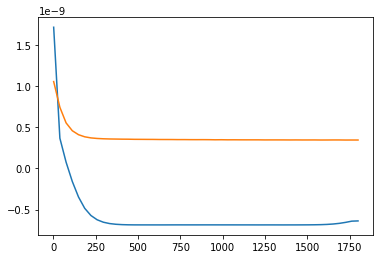

In [36]:
epoch = 50
plt.plot(np.linspace(1,1800,N_steps),np.inner(q_y[epoch,:,:].T,p[epoch,:]))
epoch = 0
plt.plot(np.linspace(1,1800,N_steps),np.inner(q_y[epoch,:,:].T,p[epoch,:]))


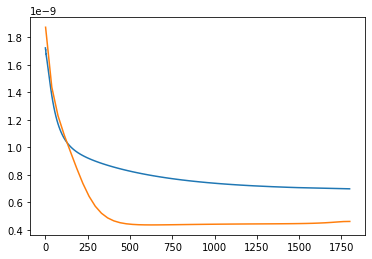

In [39]:
epoch = 30


plt.plot(q_MC_y.mean(axis=0))
# plt.plot(q_MC_y.min(axis=0))
# plt.plot(q_MC_y.max(axis=0))

# plt.plot(q_MC_y.min(axis=0))
# plt.plot(q_MC_y.max(axis=0))
plt.plot(np.linspace(1,1800,N_steps),np.inner(q_y[epoch,:,:].T,p[epoch,:]))
# plt.plot(np.linspace(1,1800,N_steps),q_y[epoch,0:4,:].max(axis=0))
# plt.plot(np.linspace(1,1800,N_steps),q_y[epoch,0:4,:].min(axis=0))

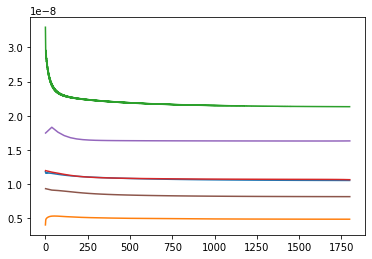

In [17]:
epoch = 41
plt.plot(q_MC_x.mean(axis=0))
plt.plot(q_MC_x.min(axis=0))
plt.plot(q_MC_x.max(axis=0))

plt.plot(np.linspace(1,1800,N_steps),np.inner(q_x[epoch,:,:].T,p[epoch,:]))
plt.plot(np.linspace(1,1800,N_steps),q_x[epoch,0:4,:].max(axis=0))
plt.plot(np.linspace(1,1800,N_steps),q_x[epoch,0:4,:].min(axis=0))

In [18]:
p[50,:]

array([6.25000000e-02, 6.25000000e-02, 6.25000000e-02, 6.25000000e-02,
       6.25000000e-02, 6.25000000e-02, 6.25000000e-02, 6.25000000e-02,
       6.25000000e-02, 6.25000000e-02, 6.25000000e-02, 6.25000000e-02,
       6.25000000e-02, 6.25000000e-02, 6.25000000e-02, 6.25000000e-02,
       2.32504749e-45, 2.32504749e-45, 2.32504749e-45, 2.32504749e-45,
       2.32504749e-45, 2.32504749e-45, 2.32504749e-45, 2.32504749e-45,
       2.32504749e-45, 2.32504749e-45, 2.32504749e-45, 2.32504749e-45,
       2.32504749e-45, 2.32504749e-45, 2.32504749e-45, 2.32504749e-45,
       2.32504749e-45, 2.32504749e-45, 2.32504749e-45, 2.32504749e-45,
       2.32504749e-45, 2.32504749e-45, 2.32504749e-45, 2.32504749e-45,
       2.32504749e-45, 2.32504749e-45, 2.32504749e-45, 2.32504749e-45,
       2.32504749e-45, 2.32504749e-45, 2.32504749e-45, 2.32504749e-45,
       2.32504749e-45, 2.32504749e-45, 2.32504749e-45, 2.32504749e-45,
       2.32504749e-45, 2.32504749e-45, 2.32504749e-45, 2.32504749e-45,
      

In [19]:
k_x[50,:,40]

array([1.01300985e-05, 6.79111003e-06, 1.01119778e-05, 1.01161724e-05,
       1.01498554e-05, 7.60110181e-06, 2.28765984e-06, 1.01247847e-05,
       1.01537641e-05, 6.79947028e-06, 1.01376416e-05, 1.01114294e-05,
       1.01443050e-05, 7.58940604e-06, 2.29030785e-06, 1.01481496e-05,
       1.01074787e-05, 1.01019817e-05, 1.01260474e-05, 1.01496470e-05,
       1.01296034e-05, 1.00999437e-05, 1.01351001e-05, 1.01093792e-05,
       1.01268395e-05, 1.01180261e-05, 1.01485293e-05, 1.01417962e-05,
       1.01184481e-05, 1.00958903e-05, 1.01376177e-05, 1.01278865e-05,
       1.00884578e-05, 1.01190999e-05, 1.00919609e-05, 1.01030284e-05,
       1.01016932e-05, 1.01482341e-05, 1.01313212e-05, 1.01262698e-05,
       1.01498293e-05, 1.01437464e-05, 1.01045639e-05, 1.01244875e-05,
       1.01219664e-05, 1.01148608e-05, 1.01277854e-05, 1.01259807e-05,
       1.01484259e-05, 1.01336409e-05, 1.01175036e-05, 1.01214593e-05,
       1.01385286e-05, 1.00997692e-05, 1.01364883e-05, 1.01212406e-05,
      

In [20]:
k_xy[36,:,40]

array([-2.76322507e-08,  6.58664989e-18,  5.25841415e-06, -2.74875561e-08,
       -2.75966392e-08,  6.58784868e-18,  5.26104804e-06, -2.74837662e-08,
       -9.92114817e-07, -9.97410394e-07, -9.94550061e-07, -9.93524053e-07,
       -9.95814950e-07, -9.94913117e-07, -9.93264191e-07, -9.93287216e-07,
       -9.93061445e-07, -9.92879953e-07, -9.97400777e-07, -9.93541681e-07,
       -9.97647154e-07, -9.92706143e-07, -9.96262790e-07, -9.91281692e-07,
       -9.93985540e-07, -9.97377129e-07, -9.96707718e-07, -9.95891401e-07,
       -9.95353247e-07, -9.93402587e-07, -9.93122603e-07, -9.97941188e-07,
       -9.90024349e-07, -9.95340508e-07, -9.93731141e-07, -9.97636610e-07,
       -9.92567222e-07, -9.96449082e-07, -9.99085029e-07, -9.98815346e-07,
       -9.93762784e-07, -9.98479711e-07, -9.91855461e-07, -9.96960069e-07,
       -1.00031506e-06, -9.98168934e-07, -9.93121455e-07, -9.92595682e-07,
       -1.00030236e-06, -9.95146076e-07, -9.94159750e-07, -9.96038816e-07,
       -9.91802087e-07, -

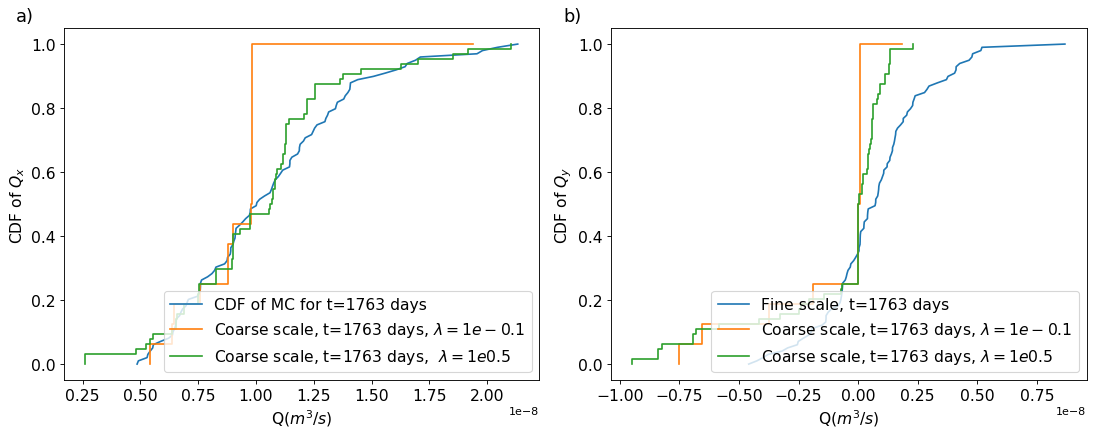

In [44]:
epoch_1 = 60
epoch_2 = 72

time_step = 49


my_dpi = 80
fig, axs = plt.subplots(1, 2, figsize=(1100/my_dpi, 400/my_dpi), dpi=my_dpi)
fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.94, wspace=0.15)
ax1 = plt.subplot(121)
ax1.text(-0.1, 1.02, 'a)', transform=ax1.transAxes,size=16)

ii = N_steps_orig//(N_steps-1) * (time_step) -1

Q_MC = q_MC_x[:,ii]

index_MC = np.argsort(Q_MC)
plt.plot(Q_MC[index_MC],np.linspace(0,1,100),label=rf'CDF of MC for t={ii} days')
plot_cdf(p,q_x ,time_step,epoch_1,label=rf'Coarse scale, t={ii} days, $\lambda = 1e{np.round(lam[epoch_1],1)}$')
plot_cdf(p,q_x ,time_step,epoch_2,label=rf'Coarse scale, t={ii} days,  $\lambda = 1e{np.round(lam[epoch_2],1)}$')

plt.xlabel(r'Q($m^3/s$)', fontsize= 14)
plt.ylabel(r'CDF of $Q_x$', fontsize= 14)

plt.tick_params(axis='both', which='major', labelsize=14)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.legend(loc=4, fontsize= 14)
# plt.xlim(0.0, 5.0e-8)

ax1 = plt.subplot(122)
ax1.text(-0.1, 1.02, 'b)', transform=ax1.transAxes,size=16)

Q_MC = q_MC_y[:,ii]

index_MC = np.argsort(Q_MC)
plt.plot(Q_MC[index_MC],np.linspace(0,1,100),label=rf'Fine scale, t={ii} days')
plot_cdf(p,q_y ,time_step,epoch_1,label=rf'Coarse scale, t={ii} days, $\lambda = 1e{np.round(lam[epoch_1],1)}$')
plot_cdf(p,q_y ,time_step,epoch_2,label=rf'Coarse scale, t={ii} days, $\lambda = 1e{np.round(lam[epoch_2],1)}$')

plt.xlabel(r'Q($m^3/s$)', fontsize= 14)
plt.ylabel(r'CDF of $Q_y$', fontsize= 14)

plt.tick_params(axis='both', which='major', labelsize=14)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.legend(loc=4, fontsize= 14)
plt.savefig('./../../../plots/2d_cdf_paper.pdf', bbox_inches='tight',dpi=my_dpi)

plt.show()

In [53]:
# x1_2d = k_y[epoch,:,:]
# w1 = p[epoch,:]
# d1 = sm.DescrStatsW(x1_2d, weights=w1)
# df_mean = d1.mean
# df_perc = d1.quantile([0.25,0.5,0.75]).values.T

In [27]:
# b_perc =df_perc


In [29]:
def plot_k(t,k,p,epoch):
    x1_2d = k[epoch,:,:]
    w1 = p[epoch,:]
    d1 = sm.DescrStatsW(x1_2d, weights=w1)
    df_mean = d1.mean
    df_perc = d1.quantile([0.25,0.5,0.75]).values.T
    b_perc =df_perc

    plt.fill_between(t,b_perc[:,0],b_perc[:,2],color=cm.get_cmap('tab20c')(3))
    plt.plot(t,b_perc[:,0], linewidth=2.5,label=r'$10^{th} / 90^{th}   percentile$',color=cm.get_cmap('tab20c')(0))
    plt.plot(t,b_perc[:,2], linewidth=2.5,color=cm.get_cmap('tab20c')(0))
    plt.plot(t,df_mean,linewidth=2.5,label=r'$Mean$',ls='--',color=cm.get_cmap('tab20c')(5))
    


In [45]:
epoch = 70
t = np.linspace(0,1800,N_steps)

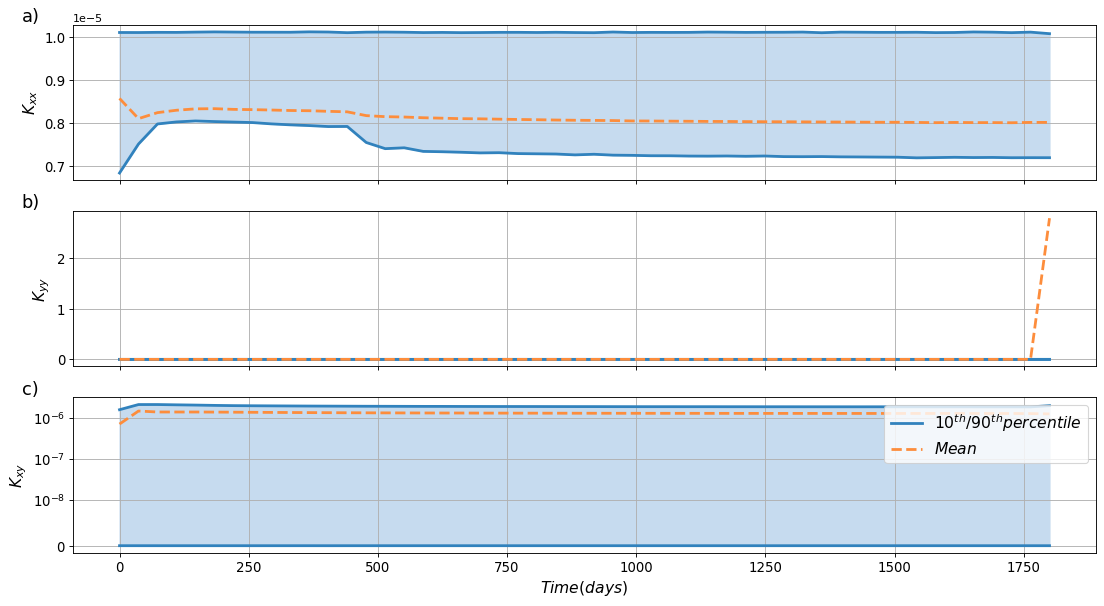

In [46]:
my_dpi = 80
fig, axs = plt.subplots(3, 1, figsize=(1100/my_dpi, 600/my_dpi), dpi=my_dpi)
fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.94, wspace=0.15)

ax1 = plt.subplot(311)
plot_k(t,k_x,p,epoch)
plt.yscale('linear')
plt.tick_params(axis='y',which='both', labelsize=12)
plt.grid()
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax1.text(-0.05, 1.02, 'a)', transform=ax1.transAxes,size=16)
plt.setp(ax1.get_xticklabels(), visible=False)
plt.ylabel(r'$K_{xx}$', fontsize= 14)


ax2 = plt.subplot(312)
plot_k(t,k_y,p,epoch)
plt.yscale('linear')
plt.tick_params(axis='y',which='both', labelsize=12)
plt.grid()
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax2.text(-0.05, 1.02, 'b)', transform=ax2.transAxes,size=16)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.ylabel(r'$K_{yy}$', fontsize= 14)


ax3 = plt.subplot(313)
plot_k(t,k_xy,p,epoch)
plt.yscale('symlog', linthreshy=1e-8)
plt.tick_params(axis='y',which='both', labelsize=12)
plt.tick_params(axis='x',which='both', labelsize=12)
plt.legend(loc=1, fontsize= 14)
plt.grid()
ax3.text(-0.05, 1.02, 'c)', transform=ax3.transAxes,size=16)
plt.ylabel(r'$K_{xy}$', fontsize= 14)

plt.xlabel(r'$Time (days)$', fontsize= 14)

plt.savefig('./../../../plots/2d_k_evo_paper.pdf', bbox_inches='tight',dpi=my_dpi)
